In [ ]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:
    
    def __init__(self, K=5, max_iters=100):
        self.K = K
        self.max_iters = max_iters

        #list of samples indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        #mean feature vector for each cluster
        self.centroids = []

        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        #initialize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        #optimization
        for _ in range(self.max_iters):
            #update clusters
            self.clusters = self._create_clusters(self.centroids)

            #update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)


            #check if converged
            if self._is_converged(centroids_old, self.centroids):
                break
 
    #return cluster labels
    return self._get_cluster_labels(self.clusters)


  def _get_cluster_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx
    return labels


  def _create_clusters(self, centroids):
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      centroid_idx = self._closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    return clusters


  def _closest_centroid(self, sample, centroids):
    distances = [euclidean_distance(sample,point) for point in centroids]
    closest_idx = np.argmin(distances)
    return closest_idx
  
    
  def _get_centroids(self, clusters):
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    return centroids
  
    
  def _is_converged(self, centroids_old, centroids):
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
    return sum(distances) == 0

In [28]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:
    
    def __init__(self, k=5, tol=0.0001, max_iter=300):
        self.k = k
        self.tol = tol # for detecting convergence
        self.max_iter = max_iter # stopping criterion if not converged
        
        self.n_samples = None # ?
        self.n_features = None # ?
        
        # centroids' coordinates
        self.centroids = []
        
        #list of samples endices for each cluster
        self.assignments = [[] for _ in range(self.k)]
        
        
    def fit(self, X):
        self.n_samples, self.n_features = X.shape
        
        # initialize centroids
        random_samples_inds = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [X[ind] for ind in random_samples_inds]
        
        # optimization
        iteration = 0
        while iteration < self.max_iter:
            self.assignments = self._assign_to_clusters(X)
            
            # update centroids
            centroids_old = self.centroids
            self.centroids = self._compute_centroids()
            
            if self._is_converged(centroids_old, self.centroids):
                iteration = self.max_iter
            else:
                iteration += 1
                
                
    def predict(self, X):
        clusters = []
        for sample in X:
            clusters.append(self._get_closest_centroid_ind(sample))
        return clusters
            
            
    def _assign_to_clusters(self, X):
        assignments = [[] for _ in range(self.k)]
        for ind, sample in enumerate(X):
            closest_centroid_ind = self._get_closest_centroid_ind(sample)
            assignments[closest_centroid_ind].append(sample)
        return assignments
        
        
    def _get_closest_centroid_ind(self, sample):
        distances = [euclidean_distance(sample, centroid) for centroid in self.centroids]
        closest_centroid_ind = np.argmin(distances)
        return closest_centroid_ind
    
    
    def _compute_centroids(self):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_id, assignment in enumerate(self.assignments):
            centroids[cluster_id] = np.mean(assignment, axis=0)
        return centroids
    
    
    def _is_converged(self, centroids_old, centroids_new):
        for cluster_id in range(self.k):
            distance = euclidean_distance(centroids_old[cluster_id], 
                                          centroids_new[cluster_id])
            if distance > self.tol:
                return False
        return True

In [29]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)

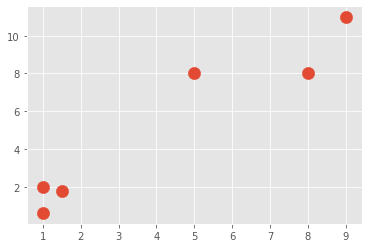

In [30]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [31]:
kmeans = KMeans(k=2)

In [32]:
kmeans.fit(X)

In [33]:
kmeans.centroids

array([[1.16666667, 1.46666667],
       [7.33333333, 9.        ]])

In [34]:
clusters = kmeans.predict(X)

In [35]:
clusters

[0, 0, 1, 1, 0, 1]